## Import packages

In [193]:
import tensorflow as tf
import keras
import numpy as np
import tensorflow_datasets as tfds
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

In [194]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D
from keras.utils import to_categorical
from keras.preprocessing.image import array_to_img
tfds.disable_progress_bar()

## Loading the train and test data

In [195]:
ds_train = tfds.load('mnist', split ='train', download= True, as_supervised =True, batch_size=-1)
ds_test = tfds.load('mnist', split='train', download =True, as_supervised=True, batch_size =-1)

In [196]:
X_train, y_train = tfds.as_numpy(ds_train)
X_test, y_test = tfds.as_numpy(ds_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (60000, 28, 28, 1) (60000,) (60000,)


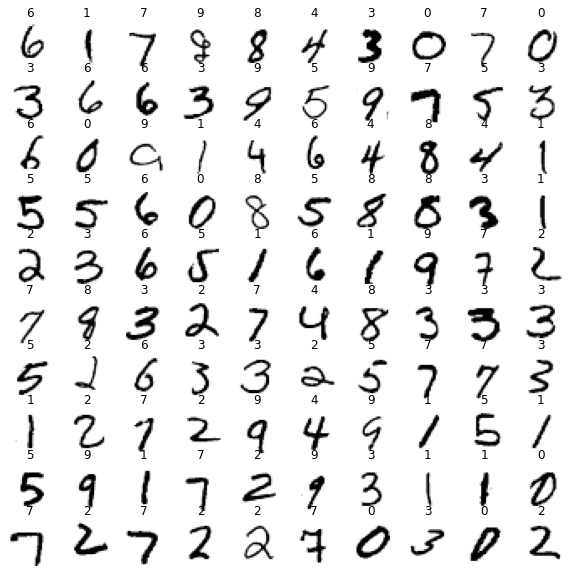

In [197]:
rand_idx = np.random.randint(60000, size=100)
plt.figure(figsize=(10,10))
for index,idx in enumerate(rand_idx):
    im = X_train[idx,:,:,0]
    plt.subplot(10,10,index+1)
    plt.imshow(im,cmap='Greys')
    plt.title(str(y_train[idx]))
    plt.axis('off')
plt.show()

In [198]:
X_train = np.float32(X_train/255.)
X_test = np.float32(X_test/255.)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Define Model with 1 convolution layer 

In [199]:
def plot_history(history):

    plt.plot(history.epoch , history.history['loss'], label = 'train loss')
    plt.plot(history.epoch , history.history['val_loss'], color = 'red', linestyle = '--', label = 'val loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()
    
    plt.plot(history.epoch , history.history['accuracy'], label = 'train acc')
    plt.plot(history.epoch , history.history['val_accuracy'], color = 'red', linestyle = '--', label = 'val acc')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    

In [200]:
model = Sequential()
model.add(Conv2D(15, kernel_size=3, input_shape = (28,28,1)))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation = 'softmax'))

optim = keras.optimizers.Adam(lr=0.001)

model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 5,verbose = 1, restore_best_weights = True)
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 15)        150       
_________________________________________________________________
flatten_27 (Flatten)         (None, 10140)             0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)               1298048   
_________________________________________________________________
dense_55 (Dense)             (None, 10)                1290      
Total params: 1,299,488
Trainable params: 1,299,488
Non-trainable params: 0
_________________________________________________________________


## Model Training

In [201]:
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 10, batch_size =128, callbacks= [callback], verbose=1)

Epoch 1/10
375/375 [==============================] - 23s 61ms/step - loss: 0.2822 - accuracy: 0.9185 - val_loss: 0.1656 - val_accuracy: 0.9523
Epoch 2/10
375/375 [==============================] - 24s 64ms/step - loss: 0.1219 - accuracy: 0.9627 - val_loss: 0.1148 - val_accuracy: 0.9661oss:
Epoch 3/10
375/375 [==============================] - 22s 60ms/step - loss: 0.0766 - accuracy: 0.9765 - val_loss: 0.1168 - val_accuracy: 0.9672
Epoch 4/10
375/375 [==============================] - 23s 61ms/step - loss: 0.0543 - accuracy: 0.9833 - val_loss: 0.1076 - val_accuracy: 0.9688
Epoch 5/10
375/375 [==============================] - 21s 56ms/step - loss: 0.0354 - accuracy: 0.9884 - val_loss: 0.1085 - val_accuracy: 0.9698
Epoch 6/10
375/375 [==============================] - 22s 59ms/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.1098 - val_accuracy: 0.9715
Epoch 7/10
375/375 [==============================] - 24s 64ms/step - loss: 0.0202 - accuracy: 0.9933 - val_loss: 0.1142 - val_accur

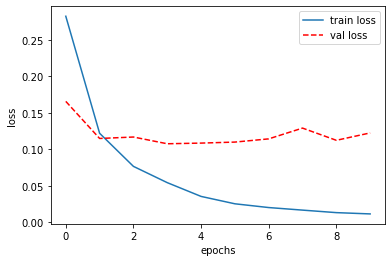

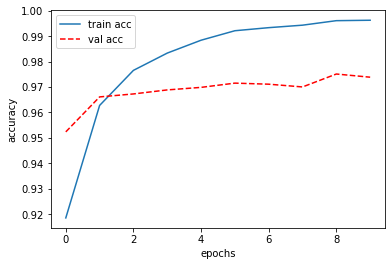

In [202]:
plot_history(history)

## Model evaluation

In [203]:
model.evaluate(X_test, y_test,batch_size=128)

469/469 [==============================] - 9s 19ms/step - loss: 0.0320 - accuracy: 0.9924


[0.031971629709005356, 0.9924166798591614]

## Checking output of convolution layer

In [210]:
conv_layer = Sequential()
conv_layer.add(model.layers[0])
conv_layer.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 15)        150       
Total params: 150
Trainable params: 150
Non-trainable params: 0
_________________________________________________________________


In [211]:
X_predict = conv_layer.predict(X_test)

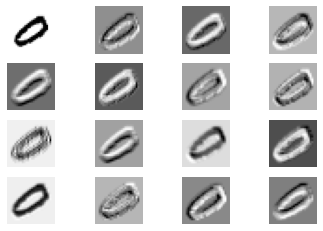

In [212]:
rand_idx = np.random.randint(10000, size=1)

for index,idx in enumerate(rand_idx):
    
    im=[]
    im.append(X_test[idx,:,:,0])
    for i in range(0,15):
        im.append(X_predict[idx,:,:,i])
    
    for i,j in enumerate(im): 
        plt.subplot(4,4,i+1)
        if i!=0:
            plt.imshow(j, cmap='Greys')
#             plt.title(str(y_train[idx]))
        else:
            plt.imshow(j, cmap='Greys')
#             plt.title(str(y_train[idx]))
        plt.axis('off')
    plt.show()
